In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('dataset.csv')

In [3]:
pd.set_option('display.max_columns', 500)

In [4]:
df

,Ware_house_ID,WH_Manager_ID,Location_type,WH_capacity_size,zone,WH_regional_zone,num_refill_req_l3m,transport_issue_l1y,Competitor_in_mkt,retail_shop_num,wh_owner_type,distributor_num,flood_impacted,flood_proof,electric_supply,dist_from_hub,workers_num,wh_est_year,storage_issue_reported_l3m,temp_reg_mach,approved_wh_govt_certificate,wh_breakdown_l3m,govt_check_l3m,product_wg_ton
0,WH_100000,EID_50000,Urban,Small,West,Zone 6,3,1,2,4651,Rented,24,0,1,1,91,29.0,NaN,13,0,A,5,15,17115
1,WH_100001,EID_50001,Rural,Large,North,Zone 5,0,0,4,6217,Company Owned,47,0,0,1,210,31.0,NaN,4,0,A,3,17,5074
2,WH_100002,EID_50002,Rural,Mid,South,Zone 2,1,0,4,4306,Company Owned,64,0,0,0,161,37.0,NaN,17,0,A,6,22,23137
3,WH_100003,EID_50003,Rural,Mid,North,Zone 3,7,4,2,6000,Rented,50,0,0,0,103,21.0,NaN,17,1,A+,3,27,22115
4,WH_100004,EID_50004,Rural,Large,North,Zone 5,3,1,2,4740,Company Owned,42,1,0,1,112,25.0,2009.0,18,0,C,6,24,24071
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24995,WH_124995,EID_74995,Rural,Small,North,Zone 1,3,0,4,5390,Rented,19,0,0,1,142,34.0,2005.0,22,1,A,2,30,32093
24996,WH_124996,EID_74996,Rural,Mid,West,Zone 2,6,0,4,4490,Company Owned,57,0,0,1,130,28.0,2012.0,10,0,B,4,18,12114
24997,WH_124997,EID_74997,Urban,Large,South,Zone 5,7,0,2,5403,Rented,31,1,0,1,147,NaN,NaN,23,0,B+,5,25,27080
24998,WH_124998,EID_74998,Rural,Small,North,Zone 1,1,0,2,10562,Rented,25,0,0,1,60,25.0,NaN,18,0,A,6,30,25093


In [5]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25000 entries, 0 to 24999
Data columns (total 24 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Ware_house_ID                 25000 non-null  object 
 1   WH_Manager_ID                 25000 non-null  object 
 2   Location_type                 25000 non-null  object 
 3   WH_capacity_size              25000 non-null  object 
 4   zone                          25000 non-null  object 
 5   WH_regional_zone              25000 non-null  object 
 6   num_refill_req_l3m            25000 non-null  int64  
 7   transport_issue_l1y           25000 non-null  int64  
 8   Competitor_in_mkt             25000 non-null  int64  
 9   retail_shop_num               25000 non-null  int64  
 10  wh_owner_type                 25000 non-null  object 
 11  distributor_num               25000 non-null  int64  
 12  flood_impacted                25000 non-null  int64  
 13  f

In [5]:
df.describe()

,num_refill_req_l3m,transport_issue_l1y,Competitor_in_mkt,retail_shop_num,distributor_num,flood_impacted,flood_proof,electric_supply,dist_from_hub,workers_num,wh_est_year,storage_issue_reported_l3m,temp_reg_mach,wh_breakdown_l3m,govt_check_l3m,product_wg_ton
count,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000,24010.000000,13119.000000,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000
mean,4.089040,0.773680,3.104200,4985.711560,42.418120,0.098160,0.054640,0.656880,163.537320,28.944398,2009.383185,17.130440,0.303280,3.482040,18.812280,22102.632920
std,2.606612,1.199449,1.141663,1052.825252,16.064329,0.297537,0.227281,0.474761,62.718609,7.872534,7.528230,9.161108,0.459684,1.690335,8.632382,11607.755077
min,0.000000,0.000000,0.000000,1821.000000,15.000000,0.000000,0.000000,0.000000,55.000000,10.000000,1996.000000,0.000000,0.000000,0.000000,1.000000,2065.000000
25%,2.000000,0.000000,2.000000,4313.000000,29.000000,0.000000,0.000000,0.000000,109.000000,24.000000,2003.000000,10.000000,0.000000,2.000000,11.000000,13059.000000
50%,4.000000,0.000000,3.000000,4859.000000,42.000000,0.000000,0.000000,1.000000,164.000000,28.000000,2009.000000,18.000000,0.000000,3.000000,21.000000,22101.000000
75%,6.000000,1.000000,4.000000,5500.000000,56.000000,0.000000,0.000000,1.000000,218.000000,33.000000,2016.000000,24.000000,1.000000,5.000000,26.000000,30103.000000
max,8.000000,5.000000,12.000000,11008.000000,70.000000,1.000000,1.000000,1.000000,271.000000,98.000000,2023.000000,39.000000,1.000000,6.000000,32.000000,55151.000000


In [8]:
df.skew()

num_refill_req_l3m           -0.075217
transport_issue_l1y           1.610907
Competitor_in_mkt             0.978456
retail_shop_num               0.908302
distributor_num               0.015213
flood_impacted                2.701327
flood_proof                   3.919343
electric_supply              -0.660933
dist_from_hub                -0.005999
workers_num                   1.059911
wh_est_year                   0.012417
storage_issue_reported_l3m    0.113345
temp_reg_mach                 0.855960
wh_breakdown_l3m             -0.068026
govt_check_l3m               -0.363262
product_wg_ton                0.331631
dtype: float64

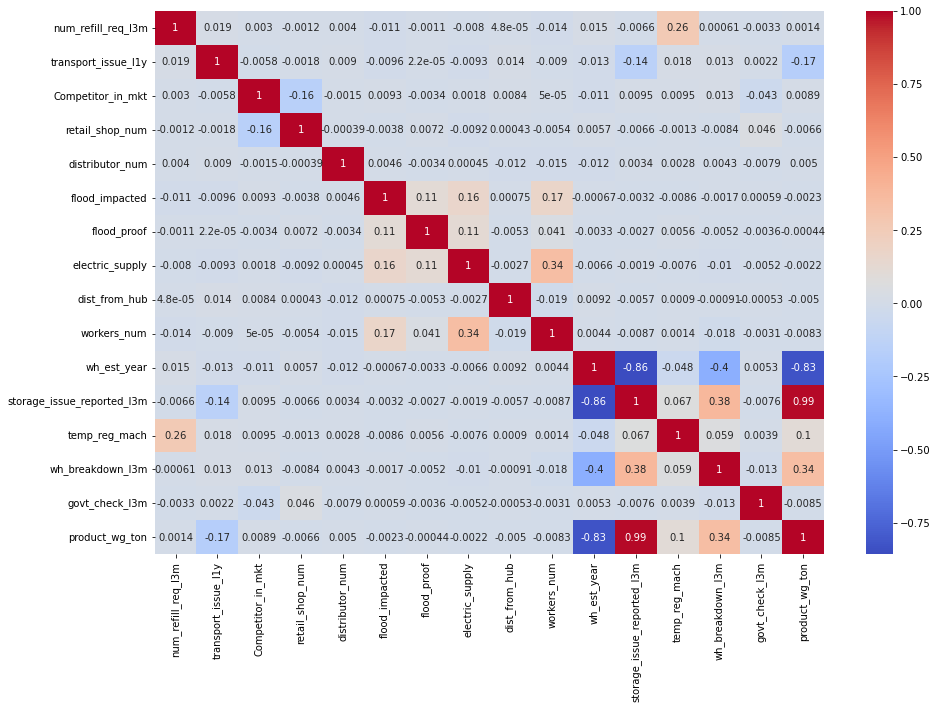

In [6]:
plt.figure(figsize=(15,10))
sns.heatmap(df.corr(),annot=True,cmap='coolwarm')
plt.show()

The correlation matrix reveals significant associations between certain features and the occurrence of reported storage issues. For instance, a robust positive correlation is evident between the frequency of refill requests and the instances of storage problems reported. This implies that warehouses with a high number of refill requests are also more likely to experience a greater number of storage issues.

Conversely, some features exhibit a weaker positive correlation with storage problems. For instance, there is a mild positive correlation between the number of distributors and the incidents of storage issues reported. This suggests that warehouses with a larger number of distributors are somewhat more prone to experiencing a higher count of storage issues.


It's important to emphasize that correlation doesn't imply causation. Merely because two variables are correlated does not mean one directly causes the other. For instance, the strong positive correlation between refill requests and storage issues doesn't prove that refill requests cause storage problems. There could be an underlying third factor that influences both refill requests and storage issues, such as ineffective warehouse management.

Here are some specific insights that can be gained from the correlation matrix:

Warehouses with a high number of refill requests, transportation issues, and competitors in the market are more likely to have a high number of storage issues reported. Warehouses that are flood-impacted or have unreliable electric supply are more likely to have a high number of storage issues reported. Warehouses that are older or have less temperature-regulated machinery are more likely to have a high number of storage issues reported. Warehouses with more workers or that have been inspected by the government in the past 13 months are less likely to have a high number of storage issues reported.

In [8]:
print(len(df['Ware_house_ID'].unique()))
print(len(df['WH_Manager_ID'].unique()))


## As we have unique values so we wont need them as we can use index value as unique warehouse

25000
25000


In [9]:
new_df = df.drop(columns= ['Ware_house_ID','WH_Manager_ID','wh_est_year'], axis = 1)



In [10]:
new_df.head(10)

,Location_type,WH_capacity_size,zone,WH_regional_zone,num_refill_req_l3m,transport_issue_l1y,Competitor_in_mkt,retail_shop_num,wh_owner_type,distributor_num,flood_impacted,flood_proof,electric_supply,dist_from_hub,workers_num,storage_issue_reported_l3m,temp_reg_mach,approved_wh_govt_certificate,wh_breakdown_l3m,govt_check_l3m,product_wg_ton
0,Urban,Small,West,Zone 6,3,1,2,4651,Rented,24,0,1,1,91,29.0,13,0,A,5,15,17115
1,Rural,Large,North,Zone 5,0,0,4,6217,Company Owned,47,0,0,1,210,31.0,4,0,A,3,17,5074
2,Rural,Mid,South,Zone 2,1,0,4,4306,Company Owned,64,0,0,0,161,37.0,17,0,A,6,22,23137
3,Rural,Mid,North,Zone 3,7,4,2,6000,Rented,50,0,0,0,103,21.0,17,1,A+,3,27,22115
4,Rural,Large,North,Zone 5,3,1,2,4740,Company Owned,42,1,0,1,112,25.0,18,0,C,6,24,24071
5,Rural,Small,West,Zone 1,8,0,2,5053,Rented,37,0,0,1,152,35.0,23,1,A+,3,3,32134
6,Rural,Large,West,Zone 6,8,0,4,4449,Company Owned,38,0,0,1,77,27.0,24,0,B,3,6,30142
7,Rural,Large,North,Zone 5,1,0,4,7183,Rented,45,0,0,0,241,23.0,18,0,C,6,24,24093
8,Rural,Small,South,Zone 6,8,1,4,5381,Rented,42,0,0,1,124,22.0,13,1,A+,5,2,18082
9,Rural,Small,South,Zone 6,4,3,3,3869,Company Owned,35,0,0,0,78,43.0,6,0,C,6,2,7130


In [11]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25000 entries, 0 to 24999
Data columns (total 21 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Location_type                 25000 non-null  object 
 1   WH_capacity_size              25000 non-null  object 
 2   zone                          25000 non-null  object 
 3   WH_regional_zone              25000 non-null  object 
 4   num_refill_req_l3m            25000 non-null  int64  
 5   transport_issue_l1y           25000 non-null  int64  
 6   Competitor_in_mkt             25000 non-null  int64  
 7   retail_shop_num               25000 non-null  int64  
 8   wh_owner_type                 25000 non-null  object 
 9   distributor_num               25000 non-null  int64  
 10  flood_impacted                25000 non-null  int64  
 11  flood_proof                   25000 non-null  int64  
 12  electric_supply               25000 non-null  int64  
 13  d

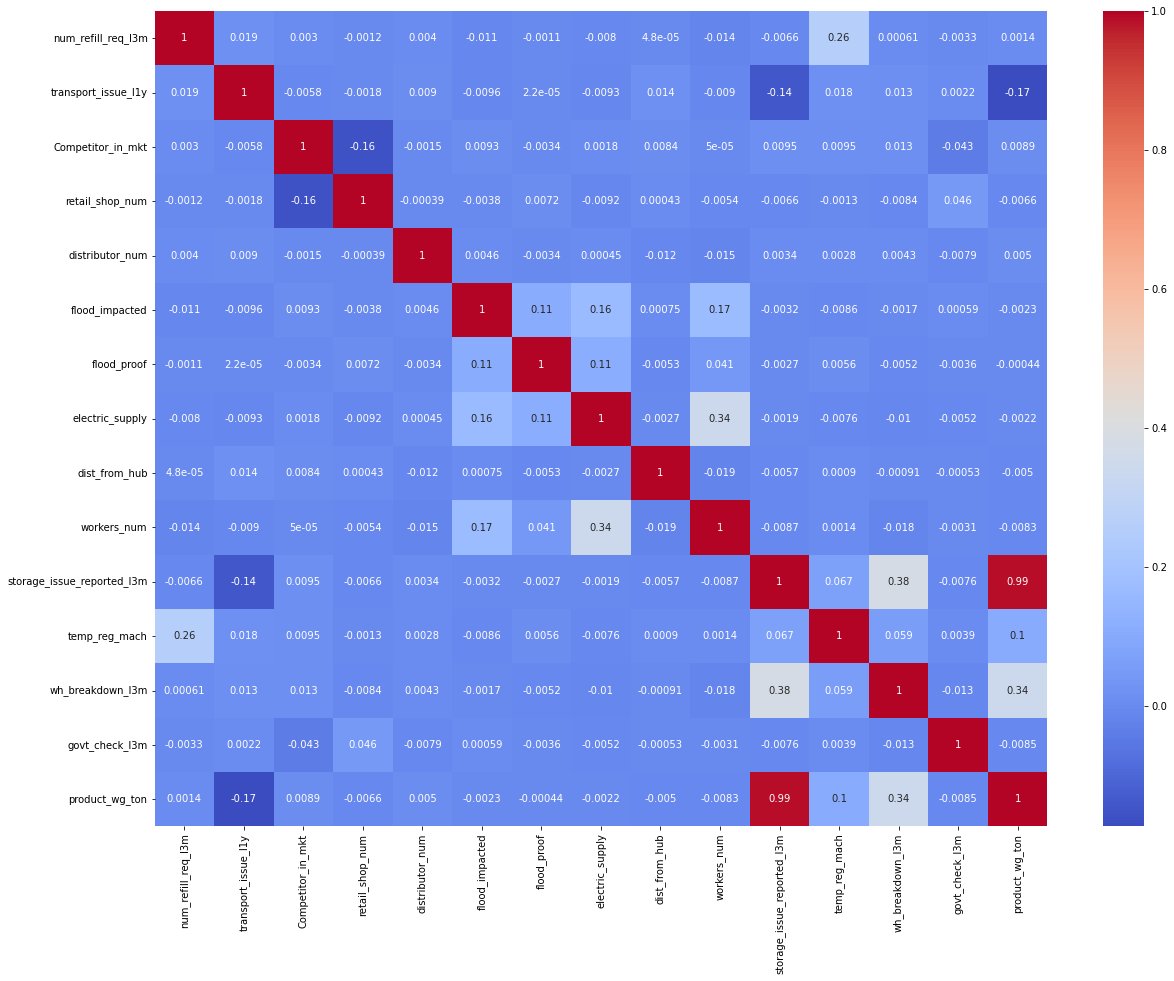

In [12]:
plt.figure(figsize=(20,15))
sns.heatmap(new_df.corr(),annot=True,cmap='coolwarm')
plt.show()

In [13]:

sns.set(rc={'figure.figsize':(11,8)})

Text(0.5, 1.0, 'Number of warehouses location wise')

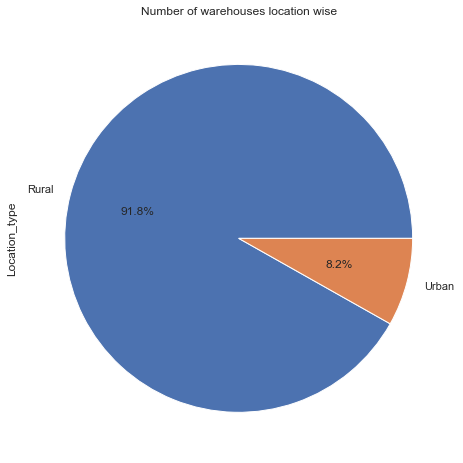

In [14]:
df = new_df['Location_type'].value_counts()
df.plot(kind='pie',figsize=(10,8), autopct= '%1.1f%%')
plt.title('Number of warehouses location wise')



<AxesSubplot:xlabel='Location_type', ylabel='product_wg_ton'>

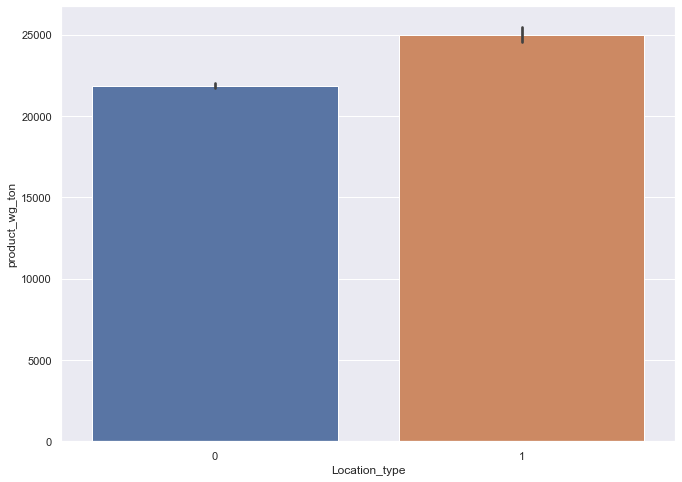

In [80]:
sns.barplot(x='Location_type',y = 'product_wg_ton',data=new_df)

<AxesSubplot:xlabel='WH_capacity_size', ylabel='product_wg_ton'>

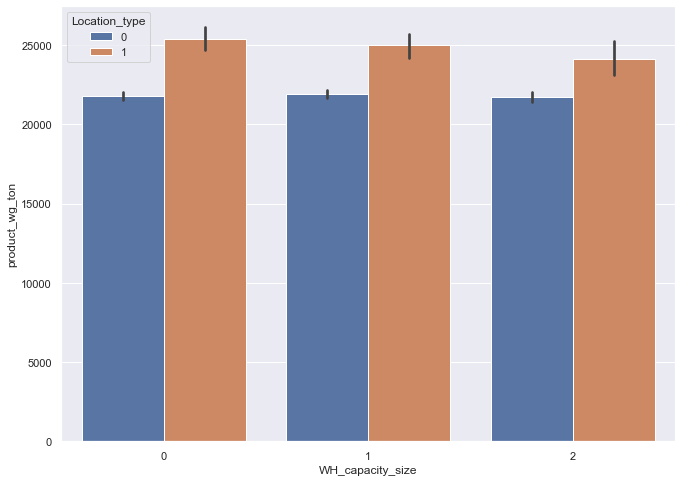

In [81]:
sns.barplot(x='WH_capacity_size',y = 'product_wg_ton',data=new_df,hue= 'Location_type')

Text(0.5, 1.0, 'Number of warehouses location wise')

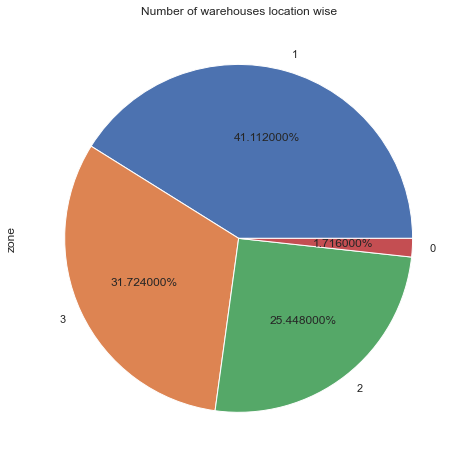

In [69]:
df = new_df['zone'].value_counts()
df.plot(kind='pie',figsize=(10,8),autopct= '%f%%')
plt.title('Number of warehouses location wise')



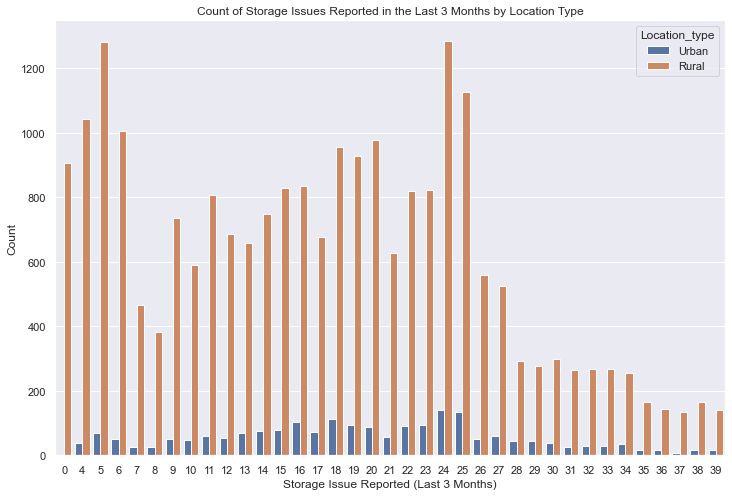

In [16]:
plt.figure(figsize=(12,8))
sns.countplot(x=new_df['storage_issue_reported_l3m'],hue=new_df['Location_type'])
plt.title('Count of Storage Issues Reported in the Last 3 Months by Location Type')
plt.xlabel('Storage Issue Reported (Last 3 Months)')
plt.ylabel('Count')
plt.show()

Text(0.5, 1.0, 'Zone wise storage capacity of warehouses')

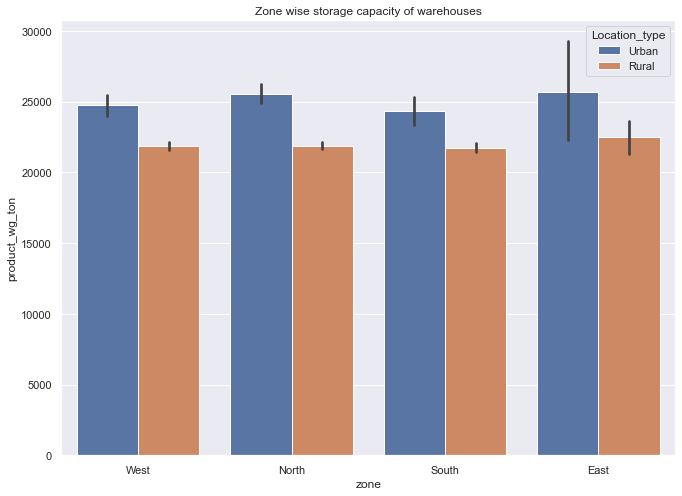

In [17]:
sns.barplot(x='zone',y = 'product_wg_ton',data=new_df,  hue= 'Location_type')

plt.title('Zone wise storage capacity of warehouses')

Text(0.5, 1.0, 'Zone wise number of competitors')

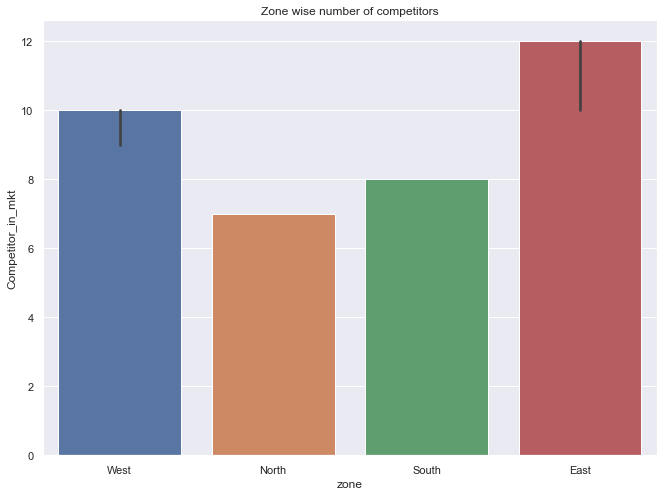

In [18]:
sns.barplot(x='zone',y = 'Competitor_in_mkt',data=new_df, estimator = np.max)

plt.title('Zone wise number of competitors')

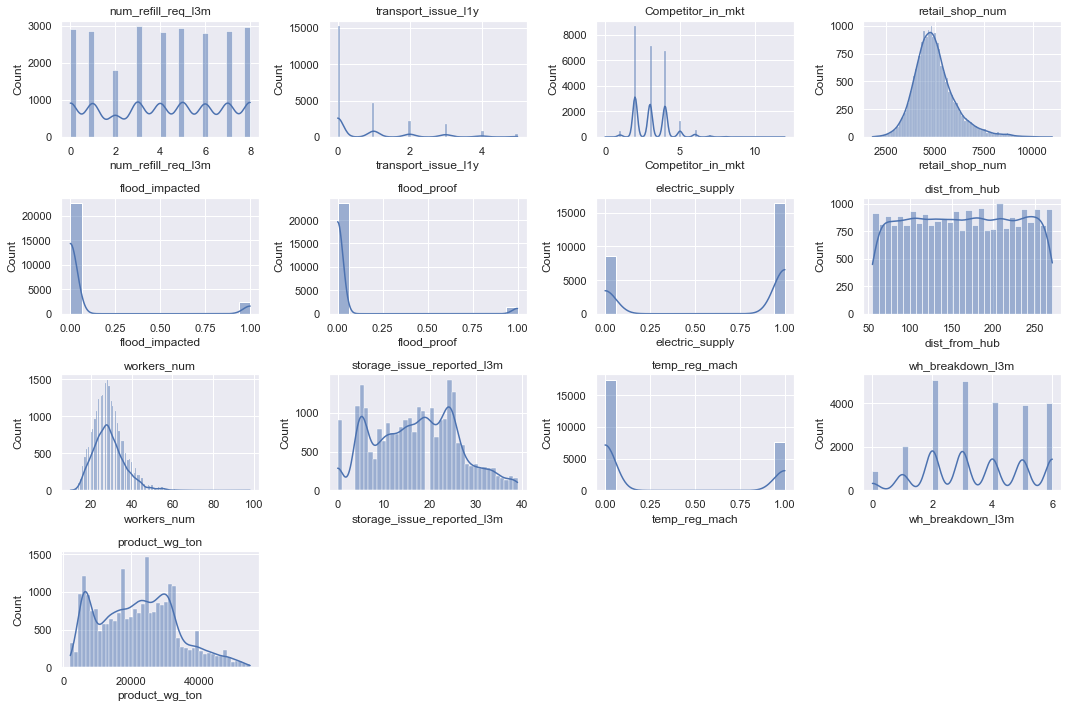

In [19]:
numerical_columns = ['num_refill_req_l3m', 'transport_issue_l1y', 'Competitor_in_mkt', 'retail_shop_num', 
                     'flood_impacted', 'flood_proof', 'electric_supply', 'dist_from_hub', 'workers_num',
                      'storage_issue_reported_l3m', 'temp_reg_mach', 'wh_breakdown_l3m', 'product_wg_ton']

plt.figure(figsize=(15, 10))
for i, col in enumerate(numerical_columns, 1):
    plt.subplot(4, 4, i)
    sns.histplot(new_df[col], kde=True)
    plt.title(col)
plt.tight_layout()
plt.show()

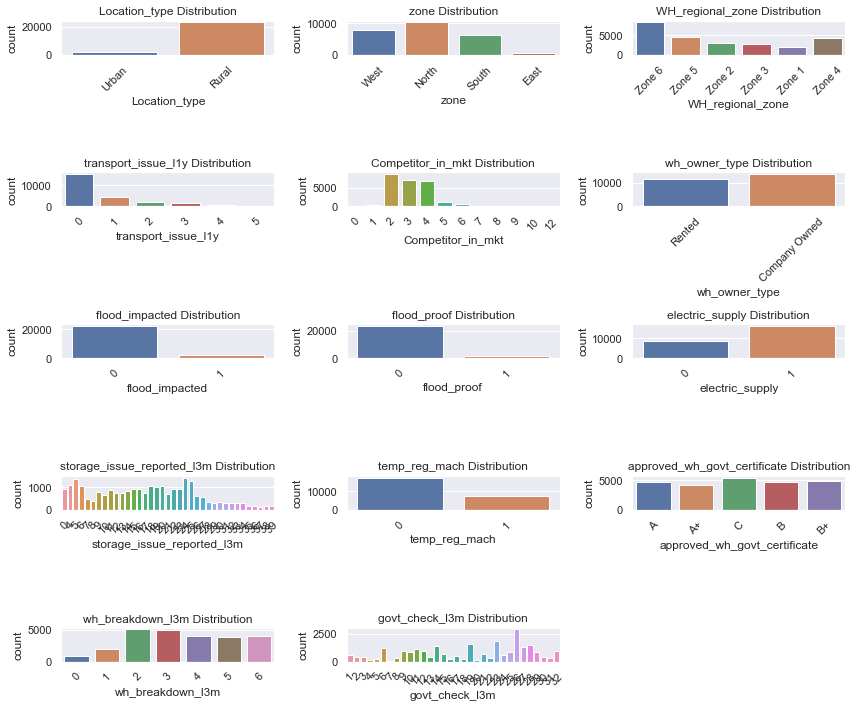

In [20]:
# Categorical Features Distribution
categorical_features = ['Location_type', 'zone', 'WH_regional_zone', 'transport_issue_l1y',
                        'Competitor_in_mkt', 'wh_owner_type', 'flood_impacted', 'flood_proof',
                        'electric_supply', 'storage_issue_reported_l3m', 'temp_reg_mach',
                        'approved_wh_govt_certificate', 'wh_breakdown_l3m', 'govt_check_l3m']

plt.figure(figsize=(12, 10))
for i, feature in enumerate(categorical_features, 1):
    plt.subplot(5, 3, i)
    sns.countplot(data=new_df, x=feature)
    plt.xticks(rotation=45)
    plt.title(f'{feature} Distribution')

plt.tight_layout()
plt.show()

Text(0.5, 1.0, 'Retail shops in urban and rural areas')

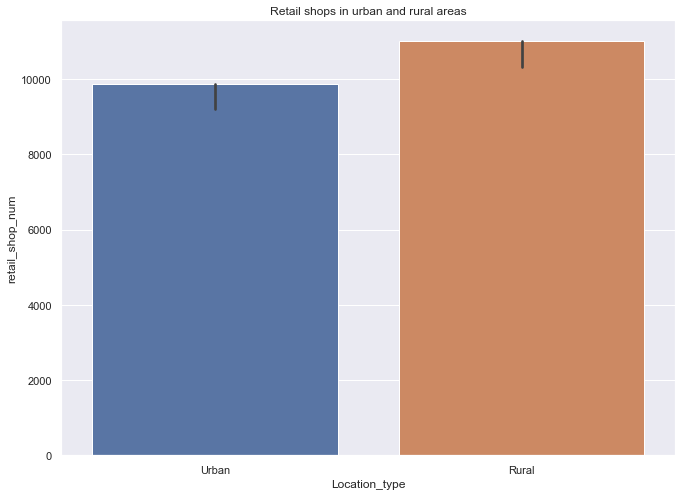

In [21]:
sns.barplot(x='Location_type',y = 'retail_shop_num',data=new_df, estimator = np.max)
plt.title('Retail shops in urban and rural areas')



Text(0.5, 1.0, 'Barplot of zonewise storage issues')

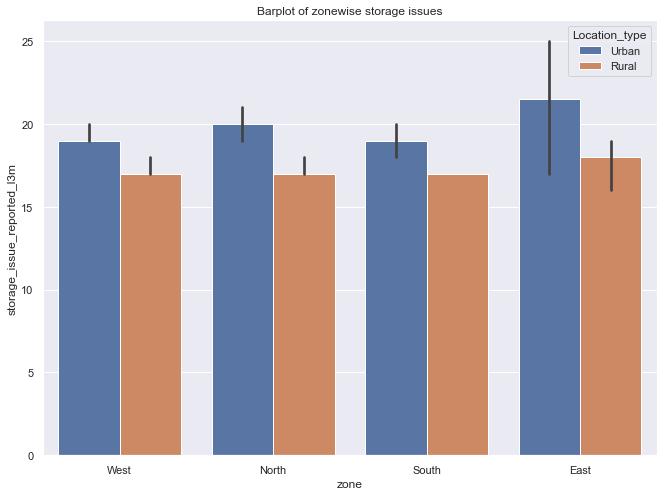

In [22]:
sns.barplot(x='zone',y = 'storage_issue_reported_l3m',data=new_df, estimator = np.median, hue = 'Location_type')
plt.title('Barplot of zonewise storage issues')


<AxesSubplot:xlabel='wh_breakdown_l3m', ylabel='product_wg_ton'>

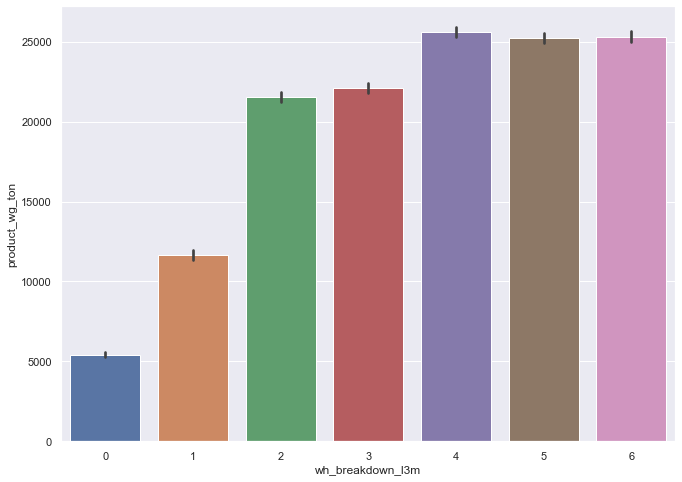

In [70]:
#sns.barplot(x='transport_issue_l1y',y = 'product_wg_ton',data=new_df,estimator= np.median, hue = 'zone')

sns.barplot(x='wh_breakdown_l3m',y = 'product_wg_ton',data=new_df)


<AxesSubplot:xlabel='transport_issue_l1y', ylabel='product_wg_ton'>

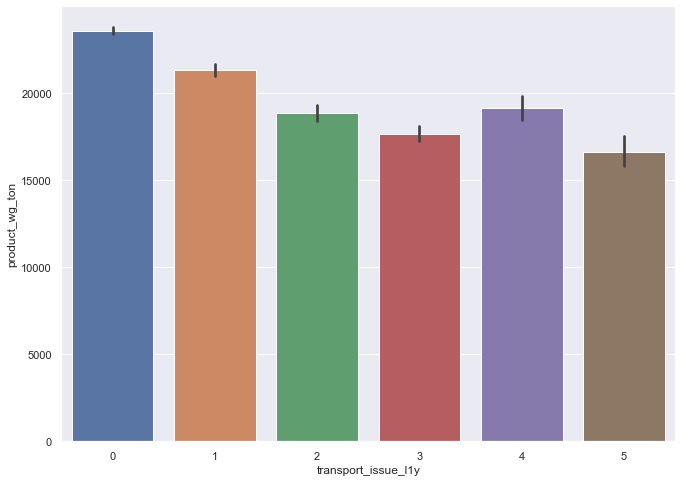

In [74]:
#sns.barplot(x='transport_issue_l1y',y = 'product_wg_ton',data=new_df,estimator= np.median, hue = 'zone')

sns.barplot(x='transport_issue_l1y',y = 'product_wg_ton',data=new_df)


<AxesSubplot:xlabel='WH_capacity_size', ylabel='product_wg_ton'>

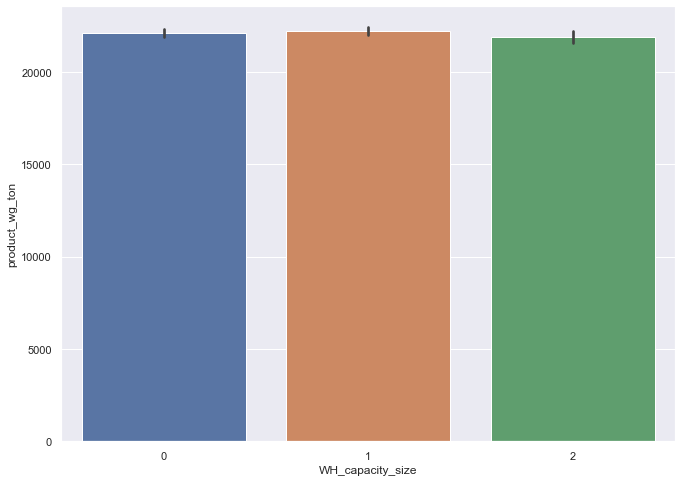

In [72]:
#sns.barplot(x='transport_issue_l1y',y = 'product_wg_ton',data=new_df,estimator= np.median, hue = 'zone')

sns.barplot(x='WH_capacity_size',y = 'product_wg_ton',data=new_df)


<AxesSubplot:xlabel='zone', ylabel='product_wg_ton'>

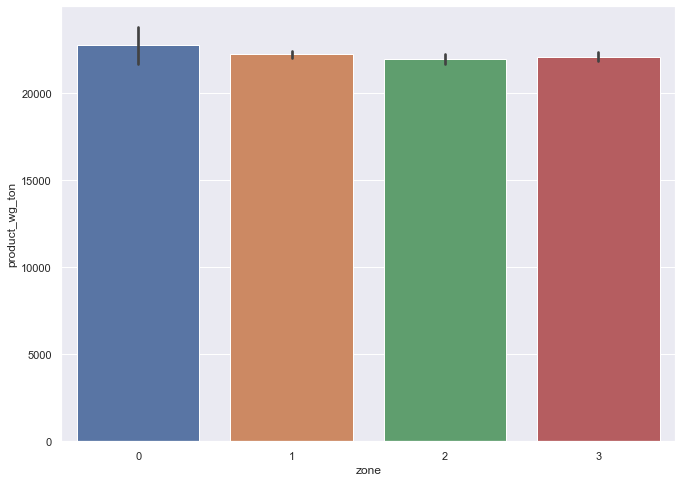

In [73]:

sns.barplot(x='zone',y = 'product_wg_ton',data=new_df)

<AxesSubplot:xlabel='flood_impacted', ylabel='product_wg_ton'>

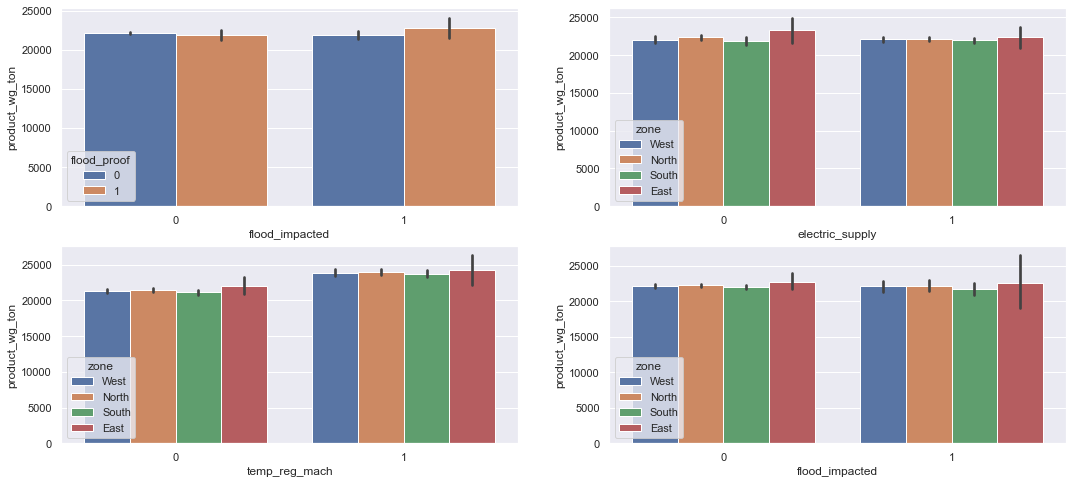

In [24]:
fig, axes = plt.subplots(nrows=2,ncols=2)
fig.set_size_inches(18,8)
sns.barplot(x='flood_impacted',y='product_wg_ton',hue='flood_proof', data=new_df, ax=axes[0][0])
sns.barplot(x='electric_supply',y='product_wg_ton',hue='zone', data=new_df, ax=axes[0][1])
sns.barplot(x='temp_reg_mach',y='product_wg_ton',hue='zone', data=new_df, ax=axes[1][0])
sns.barplot(x='flood_impacted',y='product_wg_ton',hue='zone', data=new_df, ax=axes[1][1])

<AxesSubplot:xlabel='storage_issue_reported_l3m', ylabel='product_wg_ton'>

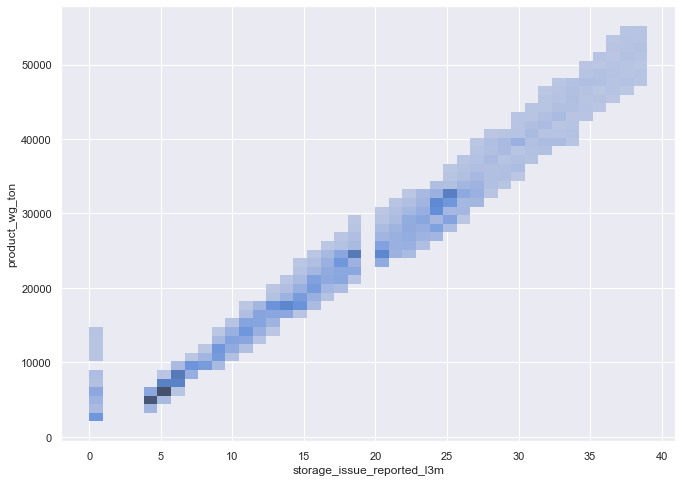

In [25]:
sns.histplot(x = 'storage_issue_reported_l3m',y='product_wg_ton', data = new_df, )

In [26]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25000 entries, 0 to 24999
Data columns (total 21 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Location_type                 25000 non-null  object 
 1   WH_capacity_size              25000 non-null  object 
 2   zone                          25000 non-null  object 
 3   WH_regional_zone              25000 non-null  object 
 4   num_refill_req_l3m            25000 non-null  int64  
 5   transport_issue_l1y           25000 non-null  int64  
 6   Competitor_in_mkt             25000 non-null  int64  
 7   retail_shop_num               25000 non-null  int64  
 8   wh_owner_type                 25000 non-null  object 
 9   distributor_num               25000 non-null  int64  
 10  flood_impacted                25000 non-null  int64  
 11  flood_proof                   25000 non-null  int64  
 12  electric_supply               25000 non-null  int64  
 13  d

In [27]:
#new_df.dropna(axis=0, inplace=True)

## Establish

new_df['workers_num'].fillna(new_df['workers_num'].median(), inplace = True)

new_df['approved_wh_govt_certificate'].fillna(new_df['approved_wh_govt_certificate'].mode()[0], inplace = True)

In [28]:
new_df.isnull().sum()

Location_type                   0
WH_capacity_size                0
zone                            0
WH_regional_zone                0
num_refill_req_l3m              0
transport_issue_l1y             0
Competitor_in_mkt               0
retail_shop_num                 0
wh_owner_type                   0
distributor_num                 0
flood_impacted                  0
flood_proof                     0
electric_supply                 0
dist_from_hub                   0
workers_num                     0
storage_issue_reported_l3m      0
temp_reg_mach                   0
approved_wh_govt_certificate    0
wh_breakdown_l3m                0
govt_check_l3m                  0
product_wg_ton                  0
dtype: int64

In [29]:
lst_of_encoding = list(new_df.select_dtypes(['object']).columns)

In [30]:
lst_of_encoding

['Location_type',
 'WH_capacity_size',
 'zone',
 'WH_regional_zone',
 'wh_owner_type',
 'approved_wh_govt_certificate']

In [31]:
lst_of_scaling = new_df.select_dtypes(['int','float']).columns

In [32]:
lst_of_scaling

Index(['num_refill_req_l3m', 'transport_issue_l1y', 'Competitor_in_mkt',
       'retail_shop_num', 'distributor_num', 'flood_impacted', 'flood_proof',
       'electric_supply', 'dist_from_hub', 'workers_num',
       'storage_issue_reported_l3m', 'temp_reg_mach', 'wh_breakdown_l3m',
       'govt_check_l3m', 'product_wg_ton'],
      dtype='object')

In [33]:
new_df.describe()

,num_refill_req_l3m,transport_issue_l1y,Competitor_in_mkt,retail_shop_num,distributor_num,flood_impacted,flood_proof,electric_supply,dist_from_hub,workers_num,storage_issue_reported_l3m,temp_reg_mach,wh_breakdown_l3m,govt_check_l3m,product_wg_ton
count,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000
mean,4.089040,0.773680,3.104200,4985.711560,42.418120,0.098160,0.054640,0.656880,163.537320,28.907000,17.130440,0.303280,3.482040,18.812280,22102.632920
std,2.606612,1.199449,1.141663,1052.825252,16.064329,0.297537,0.227281,0.474761,62.718609,7.717275,9.161108,0.459684,1.690335,8.632382,11607.755077
min,0.000000,0.000000,0.000000,1821.000000,15.000000,0.000000,0.000000,0.000000,55.000000,10.000000,0.000000,0.000000,0.000000,1.000000,2065.000000
25%,2.000000,0.000000,2.000000,4313.000000,29.000000,0.000000,0.000000,0.000000,109.000000,24.000000,10.000000,0.000000,2.000000,11.000000,13059.000000
50%,4.000000,0.000000,3.000000,4859.000000,42.000000,0.000000,0.000000,1.000000,164.000000,28.000000,18.000000,0.000000,3.000000,21.000000,22101.000000
75%,6.000000,1.000000,4.000000,5500.000000,56.000000,0.000000,0.000000,1.000000,218.000000,33.000000,24.000000,1.000000,5.000000,26.000000,30103.000000
max,8.000000,5.000000,12.000000,11008.000000,70.000000,1.000000,1.000000,1.000000,271.000000,98.000000,39.000000,1.000000,6.000000,32.000000,55151.000000


In [34]:
for i in lst_of_scaling:
        print(len(new_df[i].unique()))
        print(i)

9
num_refill_req_l3m
6
transport_issue_l1y
12
Competitor_in_mkt
4906
retail_shop_num
56
distributor_num
2
flood_impacted
2
flood_proof
2
electric_supply
217
dist_from_hub
60
workers_num
37
storage_issue_reported_l3m
2
temp_reg_mach
7
wh_breakdown_l3m
32
govt_check_l3m
4561
product_wg_ton


In [35]:
scale = lst_of_scaling.drop(['flood_impacted','flood_proof','electric_supply','temp_reg_mach','product_wg_ton',
                             'wh_breakdown_l3m', 'Competitor_in_mkt','transport_issue_l1y','num_refill_req_l3m'])



In [36]:
new_df[scale]

,retail_shop_num,distributor_num,dist_from_hub,workers_num,storage_issue_reported_l3m,govt_check_l3m
0,4651,24,91,29.0,13,15
1,6217,47,210,31.0,4,17
2,4306,64,161,37.0,17,22
3,6000,50,103,21.0,17,27
4,4740,42,112,25.0,18,24
...,...,...,...,...,...,...
24995,5390,19,142,34.0,22,30
24996,4490,57,130,28.0,10,18
24997,5403,31,147,28.0,23,25
24998,10562,25,60,25.0,18,30


In [37]:
from sklearn.preprocessing import LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler


In [38]:

le = LabelEncoder()

for i in lst_of_encoding:
    new_df[i] = le.fit_transform(new_df[i])

In [39]:
new_df

,Location_type,WH_capacity_size,zone,WH_regional_zone,num_refill_req_l3m,transport_issue_l1y,Competitor_in_mkt,retail_shop_num,wh_owner_type,distributor_num,flood_impacted,flood_proof,electric_supply,dist_from_hub,workers_num,storage_issue_reported_l3m,temp_reg_mach,approved_wh_govt_certificate,wh_breakdown_l3m,govt_check_l3m,product_wg_ton
0,1,2,3,5,3,1,2,4651,1,24,0,1,1,91,29.0,13,0,0,5,15,17115
1,0,0,1,4,0,0,4,6217,0,47,0,0,1,210,31.0,4,0,0,3,17,5074
2,0,1,2,1,1,0,4,4306,0,64,0,0,0,161,37.0,17,0,0,6,22,23137
3,0,1,1,2,7,4,2,6000,1,50,0,0,0,103,21.0,17,1,1,3,27,22115
4,0,0,1,4,3,1,2,4740,0,42,1,0,1,112,25.0,18,0,4,6,24,24071
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24995,0,2,1,0,3,0,4,5390,1,19,0,0,1,142,34.0,22,1,0,2,30,32093
24996,0,1,3,1,6,0,4,4490,0,57,0,0,1,130,28.0,10,0,2,4,18,12114
24997,1,0,2,4,7,0,2,5403,1,31,1,0,1,147,28.0,23,0,3,5,25,27080
24998,0,2,1,0,1,0,2,10562,1,25,0,0,1,60,25.0,18,0,0,6,30,25093


In [40]:
#wh_breakdown_l3m, Competitor_in_mkt,transport_issue_l1y,num_refill_req_l3m

In [41]:
#new_df[scale] = StandardScaler().fit_transform(new_df[scale])

In [42]:
new_df

,Location_type,WH_capacity_size,zone,WH_regional_zone,num_refill_req_l3m,transport_issue_l1y,Competitor_in_mkt,retail_shop_num,wh_owner_type,distributor_num,flood_impacted,flood_proof,electric_supply,dist_from_hub,workers_num,storage_issue_reported_l3m,temp_reg_mach,approved_wh_govt_certificate,wh_breakdown_l3m,govt_check_l3m,product_wg_ton
0,1,2,3,5,3,1,2,4651,1,24,0,1,1,91,29.0,13,0,0,5,15,17115
1,0,0,1,4,0,0,4,6217,0,47,0,0,1,210,31.0,4,0,0,3,17,5074
2,0,1,2,1,1,0,4,4306,0,64,0,0,0,161,37.0,17,0,0,6,22,23137
3,0,1,1,2,7,4,2,6000,1,50,0,0,0,103,21.0,17,1,1,3,27,22115
4,0,0,1,4,3,1,2,4740,0,42,1,0,1,112,25.0,18,0,4,6,24,24071
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24995,0,2,1,0,3,0,4,5390,1,19,0,0,1,142,34.0,22,1,0,2,30,32093
24996,0,1,3,1,6,0,4,4490,0,57,0,0,1,130,28.0,10,0,2,4,18,12114
24997,1,0,2,4,7,0,2,5403,1,31,1,0,1,147,28.0,23,0,3,5,25,27080
24998,0,2,1,0,1,0,2,10562,1,25,0,0,1,60,25.0,18,0,0,6,30,25093


In [43]:
new_df.describe()

,Location_type,WH_capacity_size,zone,WH_regional_zone,num_refill_req_l3m,transport_issue_l1y,Competitor_in_mkt,retail_shop_num,wh_owner_type,distributor_num,flood_impacted,flood_proof,electric_supply,dist_from_hub,workers_num,storage_issue_reported_l3m,temp_reg_mach,approved_wh_govt_certificate,wh_breakdown_l3m,govt_check_l3m,product_wg_ton
count,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000
mean,0.081720,0.785680,1.871800,3.251840,4.089040,0.773680,3.104200,4985.711560,0.456880,42.418120,0.098160,0.054640,0.656880,163.537320,28.907000,17.130440,0.303280,2.168080,3.482040,18.812280,22102.632920
std,0.273943,0.743834,0.883513,1.668283,2.606612,1.199449,1.141663,1052.825252,0.498147,16.064329,0.297537,0.227281,0.474761,62.718609,7.717275,9.161108,0.459684,1.452224,1.690335,8.632382,11607.755077
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1821.000000,0.000000,15.000000,0.000000,0.000000,0.000000,55.000000,10.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2065.000000
25%,0.000000,0.000000,1.000000,2.000000,2.000000,0.000000,2.000000,4313.000000,0.000000,29.000000,0.000000,0.000000,0.000000,109.000000,24.000000,10.000000,0.000000,1.000000,2.000000,11.000000,13059.000000
50%,0.000000,1.000000,2.000000,4.000000,4.000000,0.000000,3.000000,4859.000000,0.000000,42.000000,0.000000,0.000000,1.000000,164.000000,28.000000,18.000000,0.000000,2.000000,3.000000,21.000000,22101.000000
75%,0.000000,1.000000,3.000000,5.000000,6.000000,1.000000,4.000000,5500.000000,1.000000,56.000000,0.000000,0.000000,1.000000,218.000000,33.000000,24.000000,1.000000,4.000000,5.000000,26.000000,30103.000000
max,1.000000,2.000000,3.000000,5.000000,8.000000,5.000000,12.000000,11008.000000,1.000000,70.000000,1.000000,1.000000,1.000000,271.000000,98.000000,39.000000,1.000000,4.000000,6.000000,32.000000,55151.000000


In [44]:
x = new_df.iloc[:,:-1]
y = new_df.iloc[:,-1]

In [45]:
x

,Location_type,WH_capacity_size,zone,WH_regional_zone,num_refill_req_l3m,transport_issue_l1y,Competitor_in_mkt,retail_shop_num,wh_owner_type,distributor_num,flood_impacted,flood_proof,electric_supply,dist_from_hub,workers_num,storage_issue_reported_l3m,temp_reg_mach,approved_wh_govt_certificate,wh_breakdown_l3m,govt_check_l3m
0,1,2,3,5,3,1,2,4651,1,24,0,1,1,91,29.0,13,0,0,5,15
1,0,0,1,4,0,0,4,6217,0,47,0,0,1,210,31.0,4,0,0,3,17
2,0,1,2,1,1,0,4,4306,0,64,0,0,0,161,37.0,17,0,0,6,22
3,0,1,1,2,7,4,2,6000,1,50,0,0,0,103,21.0,17,1,1,3,27
4,0,0,1,4,3,1,2,4740,0,42,1,0,1,112,25.0,18,0,4,6,24
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24995,0,2,1,0,3,0,4,5390,1,19,0,0,1,142,34.0,22,1,0,2,30
24996,0,1,3,1,6,0,4,4490,0,57,0,0,1,130,28.0,10,0,2,4,18
24997,1,0,2,4,7,0,2,5403,1,31,1,0,1,147,28.0,23,0,3,5,25
24998,0,2,1,0,1,0,2,10562,1,25,0,0,1,60,25.0,18,0,0,6,30


In [46]:
y

0        17115
1         5074
2        23137
3        22115
4        24071
         ...  
24995    32093
24996    12114
24997    27080
24998    25093
24999     5058
Name: product_wg_ton, Length: 25000, dtype: int64

In [47]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=101)

In [48]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import GridSearchCV, cross_val_score



gbm = GradientBoostingRegressor()
gbm.fit(x_train, y_train)

GradientBoostingRegressor()

In [86]:
y_pred_train = gbm.predict(x_train)
y_pred_test = gbm.predict(x_test)

print('***For Test***')
print('MSE :', mean_squared_error(y_test, y_pred_test))
print('RMSE :', np.sqrt(mean_squared_error(y_test, y_pred_test)))

print('***For Train***')
print('MSE :', mean_squared_error(y_train, y_pred_train))
print('RMSE :', np.sqrt(mean_squared_error(y_train, y_pred_train)))

***For Test***
MSE : 846786.130520723
RMSE : 920.2098296153563
***For Train***
MSE : 851159.8362518556
RMSE : 922.5832408253771


In [50]:
from sklearn.metrics import r2_score


score = r2_score(y_train , y_pred_train)
score

0.9936774299962345

In [51]:
score = r2_score(y_test , y_pred_test)
score

0.9937359694711461

In [52]:
cv_score1 = cross_val_score(gbm, x_train, y_train, cv=10, scoring='r2').mean()
cv_score2 = cross_val_score(gbm, x_test, y_test, cv=10, scoring='r2').mean()
print(cv_score1)
print(cv_score2)

0.9934843072321075
0.9933905541675099


In [82]:
print (pd.DataFrame(gbm.feature_importances_, columns = ["Imp"], index = x_train.columns).sort_values('Imp',ascending=False))

                                       Imp
storage_issue_reported_l3m    9.886413e-01
approved_wh_govt_certificate  8.796049e-03
temp_reg_mach                 1.168131e-03
transport_issue_l1y           9.569866e-04
num_refill_req_l3m            2.295246e-04
wh_breakdown_l3m              1.837171e-04
workers_num                   6.896697e-06
distributor_num               5.625071e-06
retail_shop_num               5.230814e-06
dist_from_hub                 4.580508e-06
Competitor_in_mkt             9.617079e-07
zone                          7.896640e-07
govt_check_l3m                1.690241e-07
Location_type                 0.000000e+00
electric_supply               0.000000e+00
flood_proof                   0.000000e+00
WH_capacity_size              0.000000e+00
wh_owner_type                 0.000000e+00
WH_regional_zone              0.000000e+00
flood_impacted                0.000000e+00


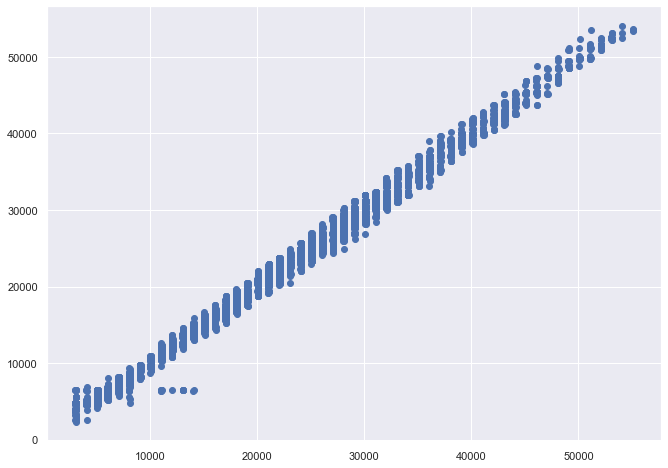

In [53]:
plt.scatter(y_test, y_pred_test)
plt.show()

In [54]:
from sklearn.ensemble import RandomForestRegressor
rfr = RandomForestRegressor()
rfr.fit(x_train, y_train)

RandomForestRegressor()

In [87]:
y_pred_train = rfr.predict(x_train)
y_pred_test = rfr.predict(x_test)


print('MSE :', mean_squared_error(y_test, y_pred_test))
print('RMSE :', np.sqrt(mean_squared_error(y_test, y_pred_test)))



print('***For Train***')
print('MSE :', mean_squared_error(y_train, y_pred_train))
print('RMSE :', np.sqrt(mean_squared_error(y_train, y_pred_train)))

MSE : 889552.5032191399
RMSE : 943.1609105657103
***For Train***
MSE : 127907.327176655
RMSE : 357.64133874128004


In [56]:
score = r2_score(y_train , y_pred_train)
score

0.9990498811202957

In [57]:
score = r2_score(y_test , y_pred_test)
score

0.9934196087579321

In [58]:
cv_score1 = cross_val_score(rfr, x_train, y_train, cv=10, scoring='r2').mean()
cv_score2 = cross_val_score(rfr, x_test, y_test, cv=10, scoring='r2').mean()
print(cv_score1)
print(cv_score2)

0.9930542730986002
0.9924607429213917


In [83]:
print (pd.DataFrame(rfr.feature_importances_, columns = ["Imp"], index = x_train.columns).sort_values('Imp',ascending=False))

                                   Imp
storage_issue_reported_l3m    0.982657
approved_wh_govt_certificate  0.009136
transport_issue_l1y           0.001122
retail_shop_num               0.000902
dist_from_hub                 0.000867
temp_reg_mach                 0.000863
distributor_num               0.000813
workers_num                   0.000700
govt_check_l3m                0.000625
num_refill_req_l3m            0.000619
wh_breakdown_l3m              0.000404
Competitor_in_mkt             0.000294
WH_regional_zone              0.000255
zone                          0.000201
WH_capacity_size              0.000142
wh_owner_type                 0.000115
electric_supply               0.000109
flood_impacted                0.000073
flood_proof                   0.000052
Location_type                 0.000050


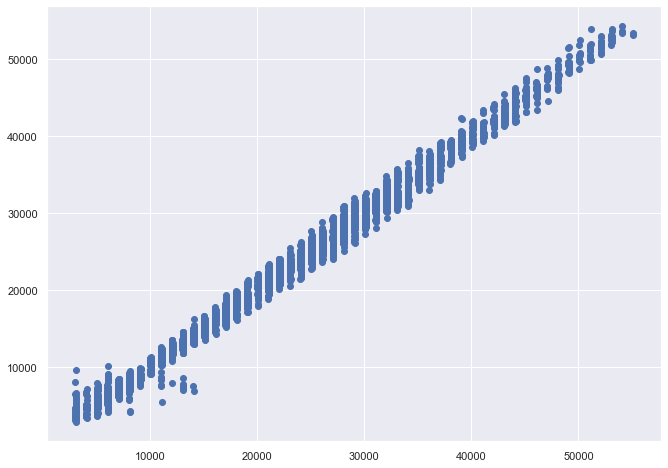

In [59]:
plt.scatter(y_test, y_pred_test)
plt.show()

In [88]:
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
lmodel = lm.fit(x_train, y_train)

In [90]:
y_pred_test = lmodel.predict(x_test)
y_pred_train  = lmodel.predict(x_train)
print('MSE :', mean_squared_error(y_test, y_pred_test))
print('RMSE :', np.sqrt(mean_squared_error(y_test, y_pred_test)))


print('***For Train***')
print('MSE :', mean_squared_error(y_train, y_pred_train))
print('RMSE :', np.sqrt(mean_squared_error(y_train, y_pred_train)))

MSE : 2984645.970510788
RMSE : 1727.6127953076718
***For Train***
MSE : 3098855.7633407195
RMSE : 1760.3567147997928


In [91]:
cv_score1 = cross_val_score(lmodel, x_train, y_train, cv=10, scoring='r2').mean()
cv_score2 = cross_val_score(lmodel, x_test, y_test, cv=10, scoring='r2').mean()
print(cv_score1)
print(cv_score2)

0.9768889700947744
0.9777826006506449


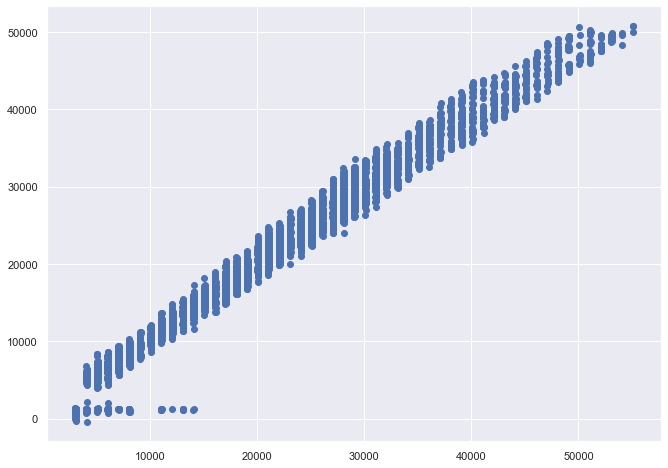

In [92]:
plt.scatter(y_test, y_pred)
plt.show()

In [1]:
### we didnt use PCA bcos it would decrease our input feature and as well as features for testing

In [ ]:
## Instead of PCA we can find the best fitted model and see the feature importance for 
#each model and remove the least important features
## Or we can use VIF and GVIF

In [1]:
def factorial(n):
    if n == 0:
        return 1
    else:
        return n*factorial(n-1)
    
    
    

In [2]:
factorial(3)

6

In [5]:
lst = [1,2,3]

lst

[1, 2, 3]

In [6]:
l = iter(lst)
l

In [ ]:
8360984479

In [ ]:
## diff between hyperparameter and parameter
generators
